In [163]:
import os

from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Load environment variables from .env file
load_dotenv()

True

In [164]:
# Load the cost of living data
cost_of_living_index_by_country_df = pd.read_csv(r'C:\Users\Nick\PycharmProjects\holman-olympic-data\datasets\countries_health\Cost of living index by country 2020.csv')
cost_of_living_index_by_country_df.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,122.40,50.25,87.89,120.27,123.01,119.53
1,Norway,101.43,36.15,70.21,91.14,109.28,88.38
2,Iceland,100.48,46.95,74.88,86.89,113.74,79.44
3,Japan,83.35,25.97,55.90,81.82,48.95,87.28
4,Denmark,83.00,31.92,58.57,61.74,100.75,100.88


In [165]:
# Connect to the database
database_url = os.getenv("DATABASE_URL")
engine = create_engine(database_url, echo=False)

In [166]:
# Load the country_olympics data in from the database
country_olympics_df = pd.read_sql("SELECT * FROM country_olympics", con=engine)
country_olympics_df.head()

,country_id,country_name,total_medals,first_year,avg_medals_per_year,total_gold,total_silver,total_bronze,years_participated
0,afg,afghanistan,1,2012,1.000000,0,0,1,1
1,alb,albania,2,2024,2.000000,0,0,2,1
2,arg,argentina,27,1996,9.000000,7,8,12,7
3,arm,armenia,17,1996,5.666667,2,10,5,6
4,aus,australia,331,1994,30.090909,99,109,123,15


In [167]:
# Load the countries data in from the database
countries_df = pd.read_sql("SELECT * FROM countries", con=engine)
countries_df.head()

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration,infant_mortality_per_1000,gdp_per_capita,literacy_percent,phones_per_1000,arable_percent,crops_percent,other_percent,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.0,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.0,15.0,75.0,2.0,22.46,3.27,None,None,None
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0.0,97.78,3.0,8.71,6.25,None,None,None


In [168]:
# Clean and standardize country names in both datasets
cost_of_living_index_by_country_df['Country'] = cost_of_living_index_by_country_df['Country'].str.strip().str.lower()
country_olympics_df['country_name'] = country_olympics_df['country_name'].str.strip().str.lower()

# Merge datasets on country name
merged_df = pd.merge(
    country_olympics_df,
    cost_of_living_index_by_country_df,
    left_on="country_name",
    right_on="Country",
    how="inner"
)

# Display merged data
merged_df.head()


,country_id,country_name,total_medals,first_year,avg_medals_per_year,total_gold,total_silver,total_bronze,years_participated,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,afg,afghanistan,1,2012,1.000000,0,0,1,1,afghanistan,24.24,4.03,14.58,17.70,17.38,28.20
1,alb,albania,2,2024,2.000000,0,0,2,1,albania,36.39,8.55,23.07,28.39,26.75,29.56
2,arg,argentina,27,1996,9.000000,7,8,12,7,argentina,32.95,8.33,21.17,25.82,30.52,47.22
3,arm,armenia,17,1996,5.666667,2,10,5,6,armenia,32.84,10.91,22.35,25.61,30.43,28.00
4,aus,australia,331,1994,30.090909,99,109,123,15,australia,73.54,34.86,55.04,67.23,70.32,107.31


      country_name  avg_medals_per_year
65   united states            79.750000
12           china            49.000000
55          russia            43.909091
25  united kingdom            39.222222
24          france            30.833333
4        australia            30.090909
34           italy            27.666667
11          canada            26.166667
47          norway            24.272727
37           japan            24.076923


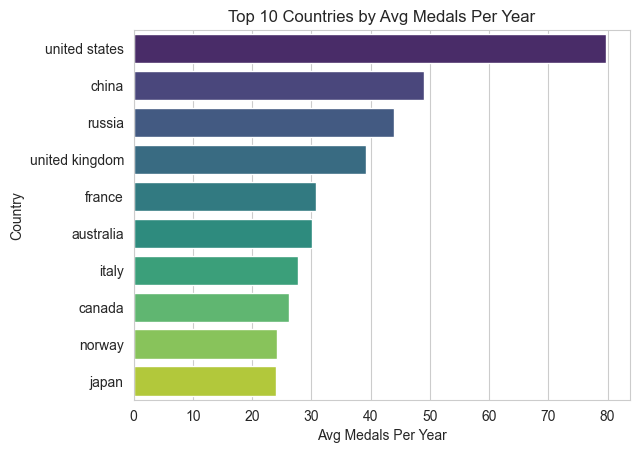

In [169]:
top_avg_medals = merged_df.nlargest(10, 'avg_medals_per_year')[['country_name', 'avg_medals_per_year']]
print(top_avg_medals)

# Plot
sns.barplot(data=top_avg_medals, x='avg_medals_per_year', y='country_name', palette='viridis', hue='country_name')
plt.title('Top 10 Countries by Avg Medals Per Year')
plt.xlabel('Avg Medals Per Year')
plt.ylabel('Country')
plt.show()


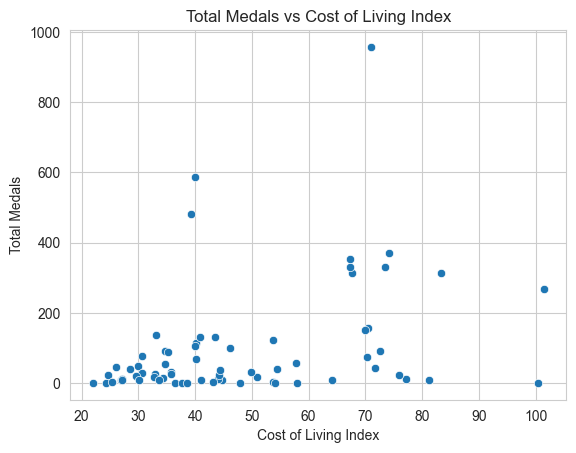

                      total_medals  Cost of Living Index
total_medals              1.000000              0.345685
Cost of Living Index      0.345685              1.000000


In [170]:
# Scatterplot of total medals vs. cost of living index
sns.scatterplot(data=merged_df, x='Cost of Living Index', y='total_medals')
plt.title('Total Medals vs Cost of Living Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Total Medals')
plt.show()

# Compute correlation
correlation = merged_df[['total_medals', 'Cost of Living Index']].corr()
print(correlation)


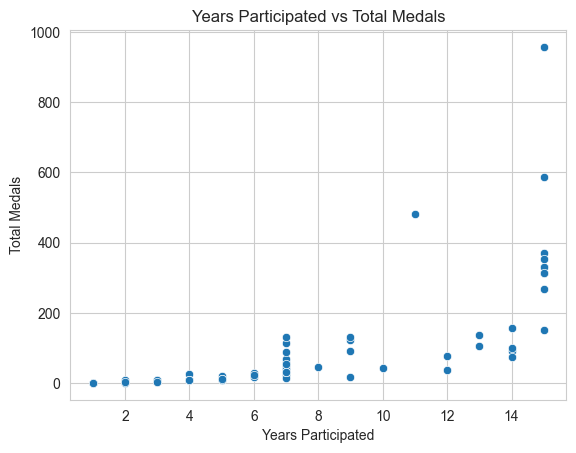

In [171]:
sns.scatterplot(data=merged_df, x='years_participated', y='total_medals')
plt.title('Years Participated vs Total Medals')
plt.xlabel('Years Participated')
plt.ylabel('Total Medals')
plt.show()


In [172]:
# Calculate medals per year of participation
merged_df['medals_per_year'] = merged_df['total_medals'] / merged_df['years_participated']

# Sort and display the top 5 countries by medals_per_year
top_efficiency = merged_df.nlargest(5, 'medals_per_year')[['country_name', 'medals_per_year', 'total_medals', 'years_participated']]
print(top_efficiency)


      country_name  medals_per_year  total_medals  years_participated
65   united states        63.800000           957                  15
55          russia        43.909091           483                  11
12           china        39.200000           588                  15
24          france        24.666667           370                  15
25  united kingdom        23.533333           353                  15


Correlation between total medals and cost of living index: 0.35


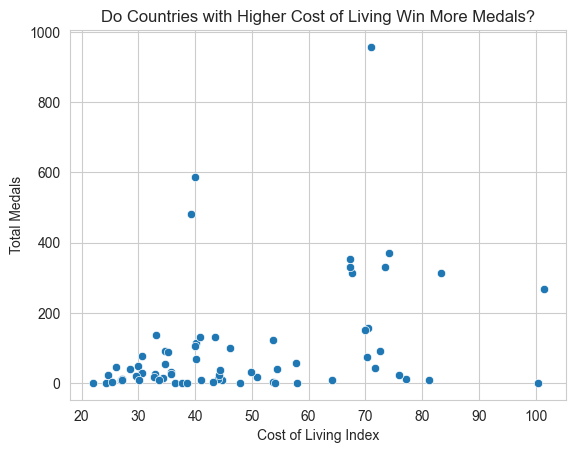

In [173]:
# Check correlation between total_medals and cost of living index
correlation = merged_df[['total_medals', 'Cost of Living Index']].corr().iloc[0, 1]
print(f"Correlation between total medals and cost of living index: {correlation:.2f}")

# Simplified visualization: Scatterplot of total medals vs. cost of living index
sns.scatterplot(data=merged_df, x='Cost of Living Index', y='total_medals')
plt.title('Do Countries with Higher Cost of Living Win More Medals?')
plt.xlabel('Cost of Living Index')
plt.ylabel('Total Medals')
plt.show()


In [174]:
# Identify outliers with high medals and low cost of living
outliers = merged_df[(merged_df['Cost of Living Index'] < 50) & (merged_df['total_medals'] > merged_df['total_medals'].mean())]
print("Outliers with low cost of living but high medals:")
print(outliers[['country_name', 'total_medals', 'Cost of Living Index']])

Outliers with low cost of living but high medals:
   country_name  total_medals  Cost of Living Index
9        brazil           114                 40.22
12        china           588                 40.04
14         cuba           131                 43.46
29      hungary           131                 40.85
52       poland           106                 40.04
55       russia           483                 39.21
64      ukraine           138                 33.18


In [175]:
# Load the NOC mapping data
noc_mapping_df = pd.read_sql("SELECT * FROM noc_mapping", con=engine)
noc_mapping_df.head()

,country_name,noc_code
0,South Georgia,SGS
1,Grenada,GRD
2,Switzerland,CHE
3,Sierra Leone,SLE
4,Hungary,HUN


In [176]:
# Normalize the common keys for merging
noc_mapping_df["noc_code"] = noc_mapping_df["noc_code"].str.lower().str.strip()
country_olympics_df["country_id"] = country_olympics_df["country_id"].str.lower().str.strip()

# Step 1: Merge CountryOlympics with noc_mapping
merged_df = pd.merge(
    country_olympics_df,
    noc_mapping_df,
    left_on="country_id",  # country_id from CountryOlympics
    right_on="noc_code",   # noc_code from noc_mapping
    how="inner"
)

# Display the merged data
merged_df.head()
# Columns: country_id (afg), country_name_x (afghanistan), total_medals (1), etc..
countries_df.head() 
# Columns: country (Afghanistan), region (ASIA (EX. NEAR EAST)) population (31056997), etc..

# Normalize the necessary columns in merged_df and countries_df
merged_df["country_name_x"] = merged_df["country_name_x"].str.lower().str.strip()  # From noc_mapping
countries_df["country"] = countries_df["country"].str.lower().str.strip()          # From countries table

# Merge normalized merged_df with countries_df
final_df = pd.merge(
    merged_df,
    countries_df,
    left_on="country_name_x",  # Normalized country_name_x from merged_df
    right_on="country",
    how="inner"
)
final_df.head()

,country_id,country_name_x,total_medals,first_year,avg_medals_per_year,total_gold,total_silver,total_bronze,years_participated,country_name_y,...,phones_per_1000,arable_percent,crops_percent,other_percent,climate,birthrate,deathrate,agriculture,industry,service
0,afg,afghanistan,1,2012,1.000000,0,0,1,1,Afghanistan,...,3.2,12.13,0.22,87.65,1.0,46.6,20.34,0.38,0.24,0.38
1,alb,albania,2,2024,2.000000,0,0,2,1,Albania,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,arg,argentina,27,1996,9.000000,7,8,12,7,Argentina,...,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
3,arm,armenia,17,1996,5.666667,2,10,5,6,Armenia,...,195.7,17.55,2.3,80.15,4.0,12.07,8.23,0.239,0.343,0.418
4,aus,australia,331,1994,30.090909,99,109,123,15,Australia,...,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.7
